  #                                  Heart Attack Analysis & Prediction

### Introduction
- A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
- The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
- Coronary artery disease (CAD) is the main cause of heart attack.

#### Data Content
- Age: Age of the patient
- Sex: Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- caa: number of major vessels (0-3)
- cp: Chest Pain type chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
- trtbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- target: 0= less chance of heart attack 1= more chance of heart attack

### Importing Libraries: The required libraries are imported at the beginning of the code.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at "C:\Users\dell\Downloads\Deep Learning data\6.overlap.csv". The dataset is stored in the DataFrame df.

In [70]:
df = pd.read_csv(r"C:\Users\dell\Downloads\heart.csv")


#### The first few rows of the DataFrame are displayed using the head() function.

In [71]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [72]:
df.shape

(303, 14)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [74]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [75]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [76]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


1. Detecting a duplicate values
2. Removing duplicate values

In [77]:
df.duplicated().sum()

1

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

In [80]:
df.value_counts(normalize=True)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
29   1    1   130     204   0    0        202       0     0.0      2    0    2      1         0.003311
59   1    2   150     212   1    1        157       0     1.6      2    0    2      1         0.003311
          1   140     221   0    1        164       1     0.0      2    0    2      1         0.003311
          0   170     326   0    0        140       1     3.4      0    0    3      0         0.003311
              164     176   1    0        90        0     1.0      1    2    1      0         0.003311
                                                                                                ...   
51   1    0   140     299   0    1        173       1     1.6      2    0    3      0         0.003311
                      298   0    1        122       1     4.2      1    3    3      0         0.003311
                      261   0    0        186       1     0.0      2    0    2      1

In [81]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [82]:
def col_names(dataframe, cat_th=10):

    # cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]    
    cat_cols = cat_cols + num_cat
    

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Variables: {dataframe.shape[1]}")
    print(f'Number of Categorical Variables: {len(cat_cols)}')
    print(f'Number of Numeric Variables: {len(num_cols)}')
    
    
    return cat_cols, num_cols

In [83]:
cat_cols, num_cols = col_names(df)

Variables: 14
Number of Categorical Variables: 9
Number of Numeric Variables: 5


In [84]:
print(cat_cols)
print(num_cols)

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


### Data Visualization:

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


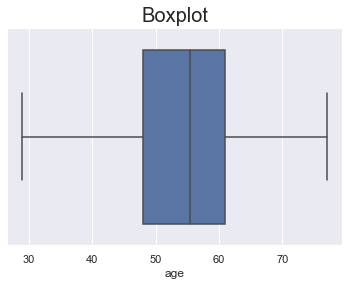

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


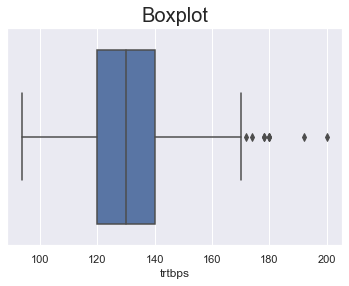

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


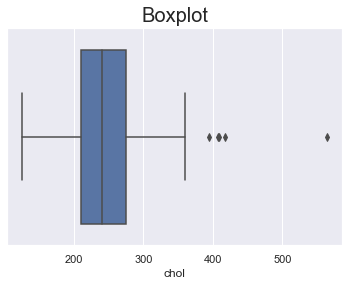

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


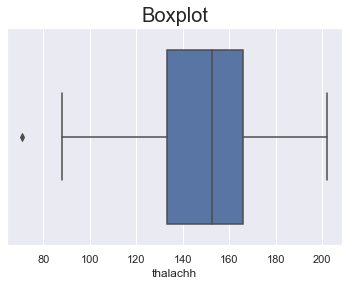

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


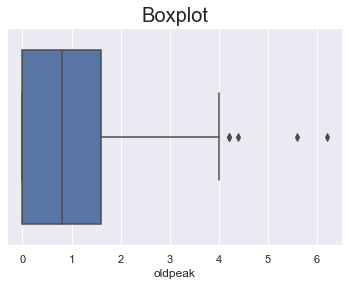

In [85]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.title('Boxplot',fontsize=20)
    plt.show()

### Observation:
 A visual representation of the distribution, spread, and outliers (if any) in the numerical variables 'age', 'trtbps', 'chol', 'thalachh', and 'oldpeak'. Each boxplot will give information about the median, quartiles, and any extreme values or outliers present in the data for each column. 

In [88]:
def histPlot(num):
    sns.histplot(data = df, x = num, bins = 50, kde = True)
    print("{} distribution with hist:".format(num))
    plt.show()

age distribution with hist:


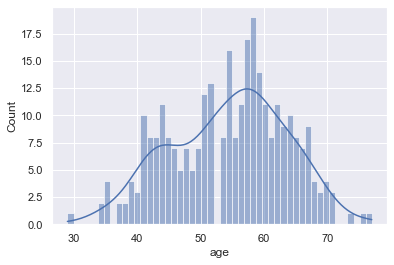

trtbps distribution with hist:


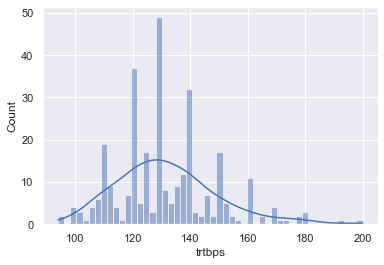

chol distribution with hist:


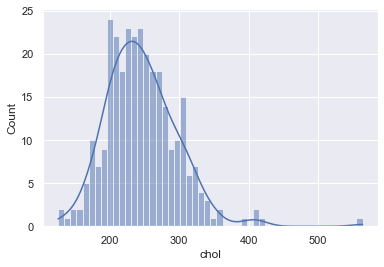

thalachh distribution with hist:


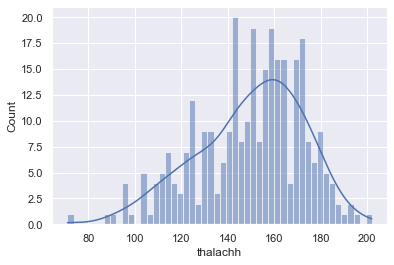

oldpeak distribution with hist:


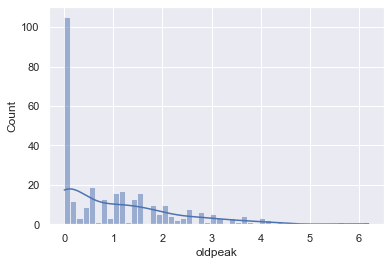

In [89]:
for i in num_cols:
    histPlot(i)

### Observation:
The histograms provide information about the shape, central tendency, and spread of the data for each column. 

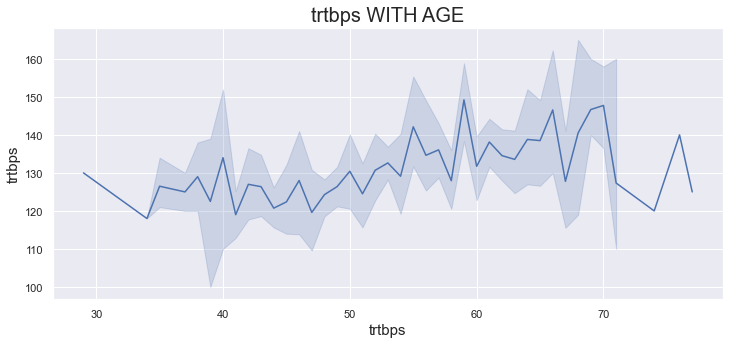

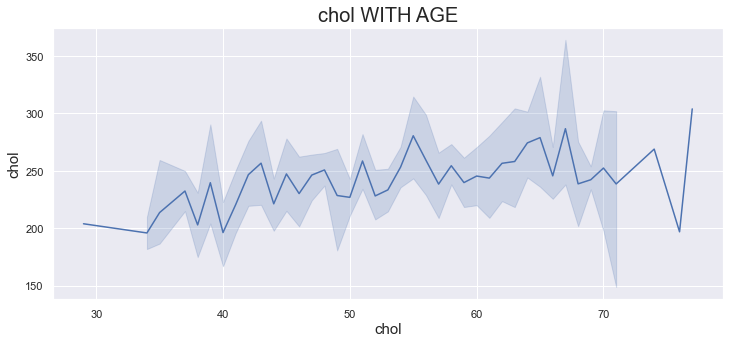

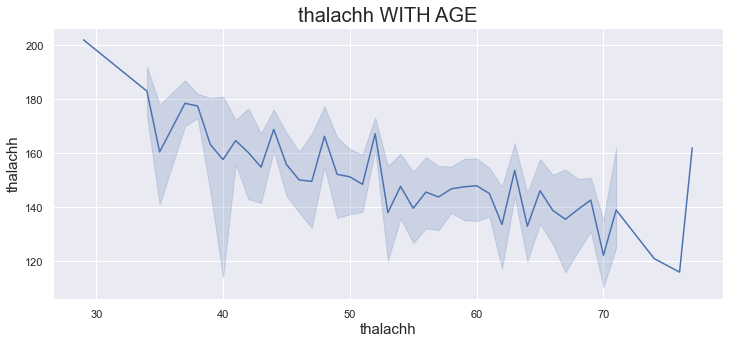

In [90]:
for i in ['trtbps', 'chol', 'thalachh']:
    plt.figure(figsize=(12,5))
    sns.lineplot(y=i,x="age",data=df)
    plt.title(f"{i} WITH AGE",fontsize=20)
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()


### Observation:
This line plots show the relationship between the variables 'trtbps', 'chol', and 'thalachh' with respect to the variable 'age'. Each plot visualizes how the respective variable changes over different age values.

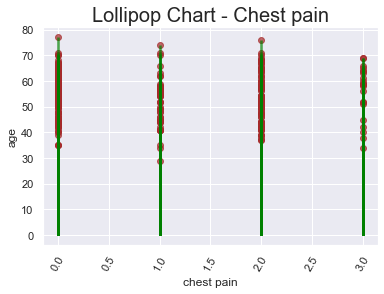

In [91]:


# Sort the DataFrame by the 'age' column
df.sort_values('age',inplace=True)

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the lollipop chart
ax.vlines(x=df.cp, ymin=0, ymax=df['age'], color='green', alpha=0.7, linewidth=2.5)
ax.scatter(x=df.cp, y=df['age'], color='brown',  alpha=0.7)

# Customize the chart
ax.set_title('Lollipop Chart - Chest pain',fontsize=20)
ax.set_xlabel('chest pain')
ax.set_ylabel('age')

# Rotate the x-axis labels
plt.xticks(rotation=60)

# Display the chart
plt.show()

### Observation:
The lollipop chart represents the 'chest pain' variable on the x-axis and the corresponding 'age' values on the y-axis. The vertical lines indicate the age values associated with each chest pain category, while the scatter points mark the specific data points. 

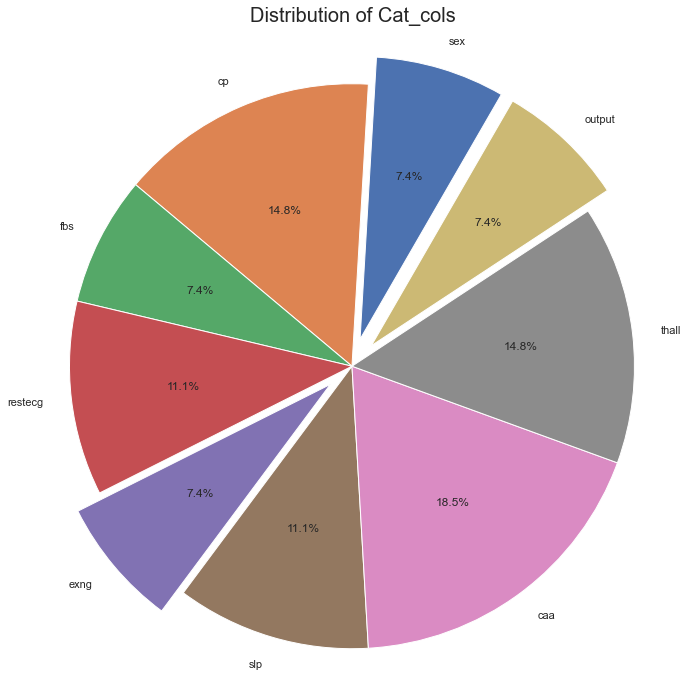

In [92]:
# Calculate the count of unique values for each variable
explode = [ 0.1, 0, 0, 0, 0.1, 0, 0, 0,0.1]  # Explode values for each slice (if desired)

counts = []
variables = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

for variable in variables:
    count = df[variable].nunique()
    counts.append(count)

# Plotting the pie chart
plt.figure(figsize=(12, 12))

plt.pie(counts, labels=variables,explode = explode, autopct='%2.1f%%', startangle=60)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Cat_cols',fontsize=20)
plt.show()

### Observation:
The pie chart visualizes the distribution of unique values for each categorical variable. The percentage values displayed on each slice provide information about the relative frequency of each unique value within its respective variable

C:\Users\dell\AppData\Local\Temp\ipykernel_8264\1857793802.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar()


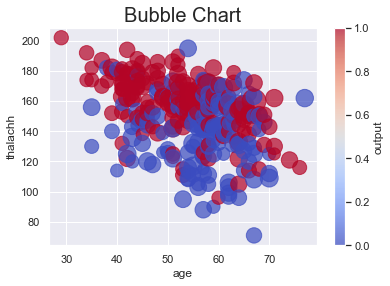

In [93]:
# Select columns for bubble chart
x = 'age'
y = 'thalachh'
bubble_size = 'chol'
bubble_color = 'output'

# Scatter plot with bubble size and color
plt.scatter(df[x], df[y], s=df[bubble_size],c=df[bubble_color],  cmap='coolwarm', alpha=0.7)

# Set labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart',fontsize=20)

# Add color bar legend

colorbar = plt.colorbar()
colorbar.set_label(bubble_color)

# Display the chart
plt.show()


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


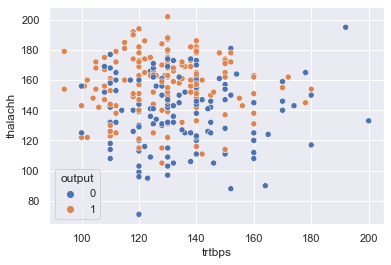

In [94]:
sns.scatterplot(df['trtbps'],df['thalachh'],hue = df['output'])
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


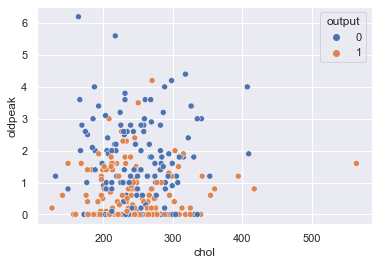

In [95]:
sns.scatterplot(df['chol'],df['oldpeak'],hue = df['output'])
plt.show()

In [96]:
print(num_cols)

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


<AxesSubplot:title={'center':'Violin plot'}>

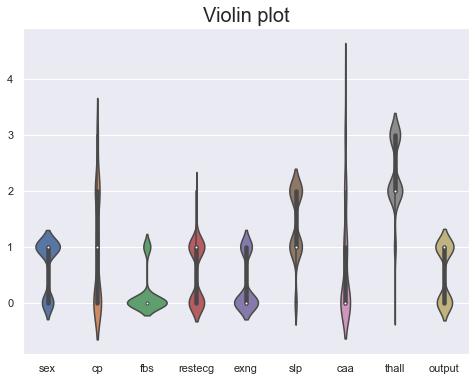

In [97]:
# Creating the violin plot
variable = [ 'age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(8, 6))
plt.title('Violin plot',fontsize=20)


#plt.figure(figsize = (3,3))
sns.violinplot(data =df[variables])

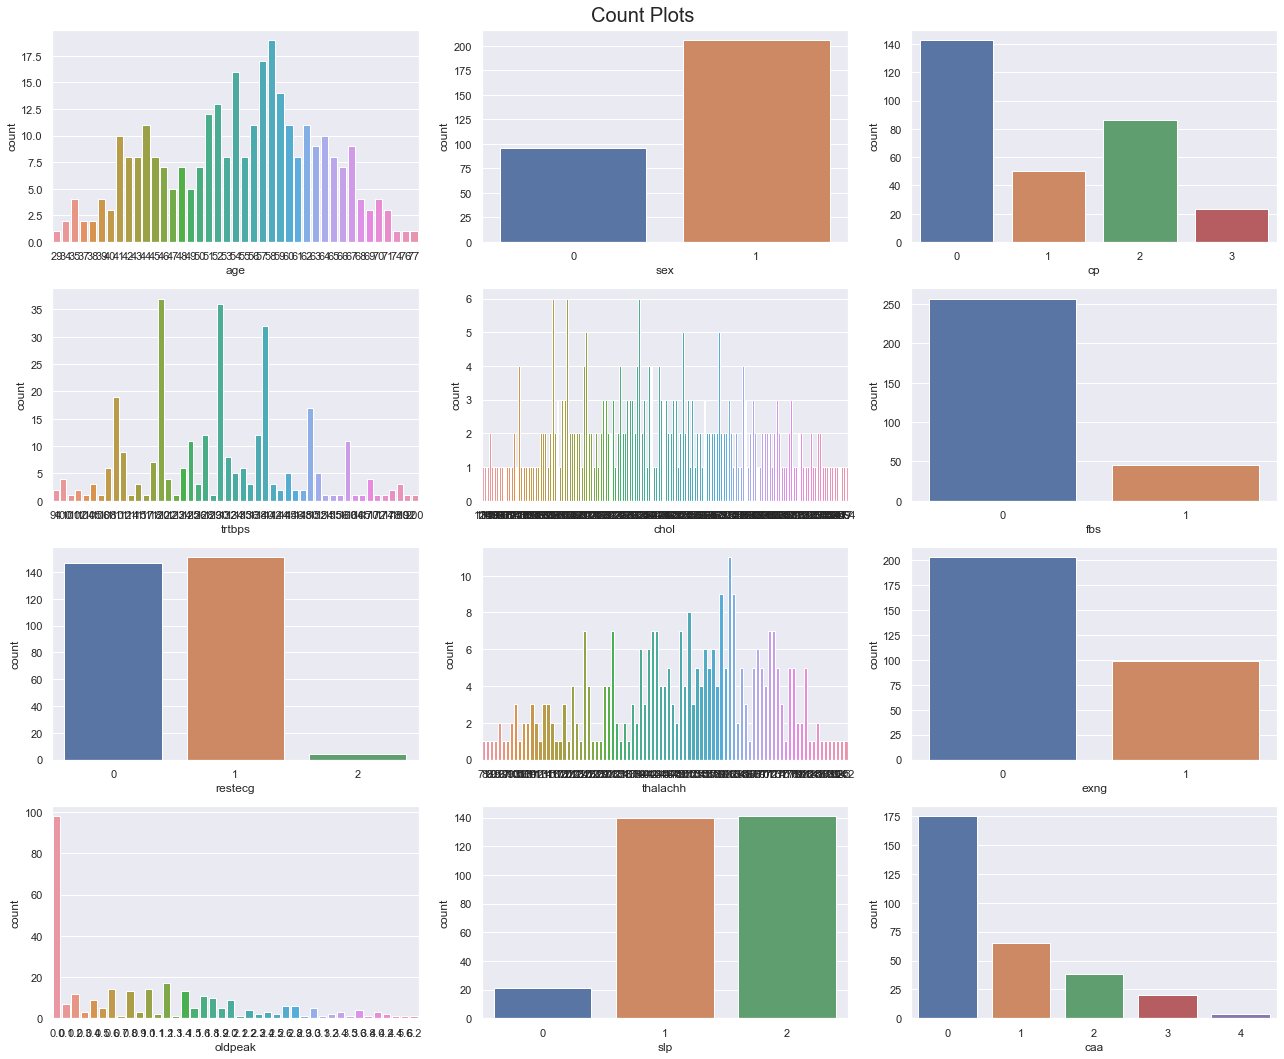

In [98]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 3, figsize=(18, 15))
fig.suptitle("Count Plots", fontsize=20)

sns.countplot(ax=axs[0, 0], data=df, x='age')
sns.countplot(ax=axs[0, 1], data=df, x='sex')
sns.countplot(ax=axs[0, 2], data=df, x='cp')
sns.countplot(ax=axs[1, 0], data=df, x='trtbps')
sns.countplot(ax=axs[1, 1], data=df, x='chol')
sns.countplot(ax=axs[1, 2], data=df, x='fbs')
sns.countplot(ax=axs[2, 0], data=df, x='restecg')
sns.countplot(ax=axs[2, 1], data=df, x='thalachh')
sns.countplot(ax=axs[2, 2], data=df, x='exng')
sns.countplot(ax=axs[3, 0], data=df, x='oldpeak')
sns.countplot(ax=axs[3, 1], data=df, x='slp')
sns.countplot(ax=axs[3, 2], data=df, x='caa')

plt.tight_layout()
plt.show()


In [99]:
num_cols.append("output")   
num_cols


['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

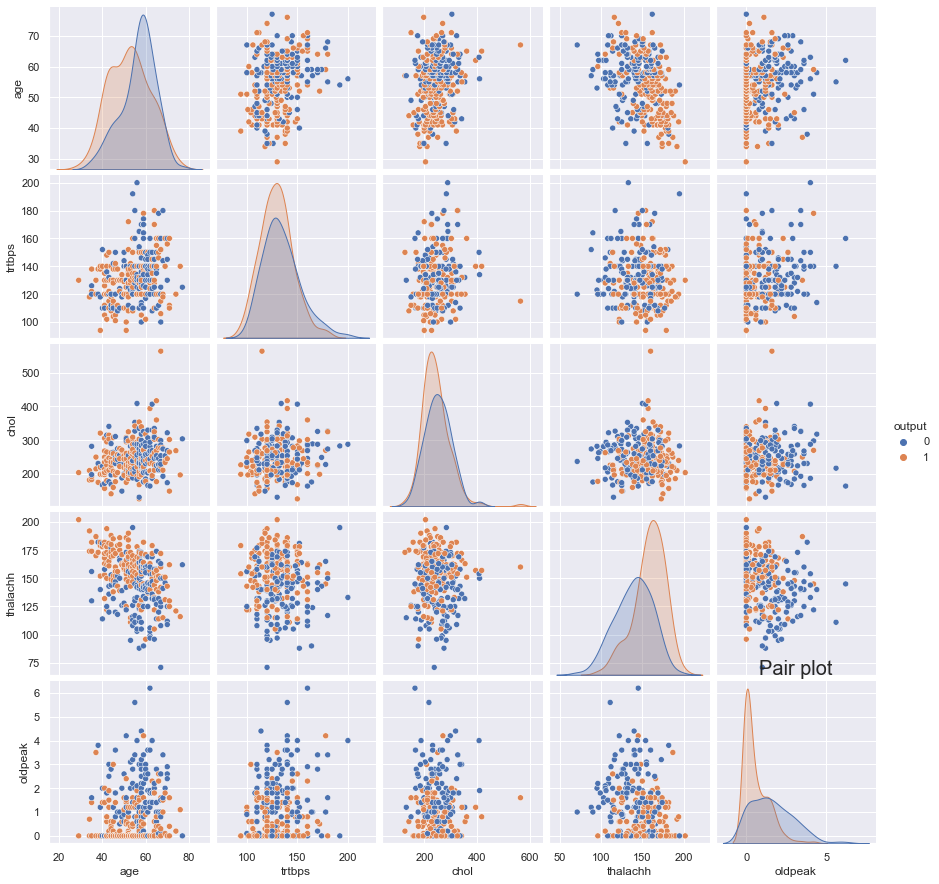

In [100]:
df_numeric = df.loc[:, num_cols]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.title('Pair plot',fontsize=20)

plt.show()

In [101]:
corr = df.corr()# Calculate the correlation matrix

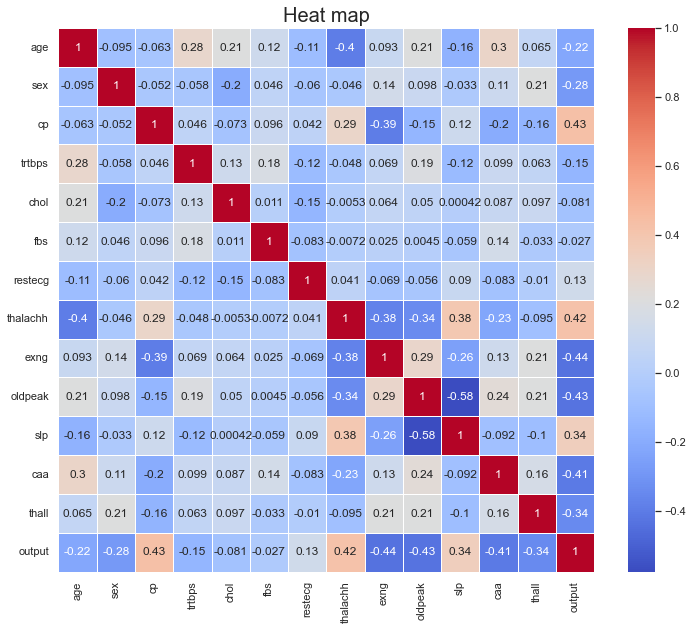

In [102]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat map',fontsize=20)

plt.show()

In [103]:
y=df['output']
X=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]


In [104]:
y.head()

72     1
58     1
125    1
239    0
65     1
Name: output, dtype: int64

In [105]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2


### Train-Test Split:
This splits the data into training and testing sets, with 80% of the data used for training and 20% used for testing. The shapes of the training and testing sets are then printed.

In [106]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.80, random_state = 42)

print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(241, 13) (241,)
(61, 13) (61,)


### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [107]:
# scale the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [109]:
X_train_scaled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,-0.037359,0.711512,-0.915352,-0.430542,0.411274,-0.384212,-0.967216,-1.673946,1.379715,0.958237,-0.603145,0.284983,1.125965
1,0.518413,0.711512,-0.915352,0.467332,-1.321813,-0.384212,0.912615,0.579802,1.379715,-0.932561,1.011943,0.284983,1.125965
2,0.407259,-1.405457,1.028259,-0.655010,1.852268,-0.384212,0.912615,1.005038,-0.724787,-0.932561,1.011943,-0.710392,-0.498931
3,-0.704286,0.711512,0.056453,-1.216181,-0.309223,-0.384212,0.912615,0.834944,-0.724787,-0.073107,-2.218232,-0.710392,1.125965
4,0.296104,0.711512,0.056453,1.252971,-0.250804,-0.384212,-0.967216,0.664850,-0.724787,-0.932561,1.011943,0.284983,-0.498931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.407259,0.711512,-0.915352,0.804035,-0.523425,-0.384212,0.912615,-1.844040,-0.724787,0.786347,-0.603145,0.284983,1.125965
237,-0.815440,0.711512,-0.915352,-1.216181,0.586530,-0.384212,-0.967216,-1.291234,1.379715,-0.073107,-0.603145,0.284983,-0.498931
238,-0.259668,0.711512,0.056453,-0.655010,1.560174,-0.384212,0.912615,1.005038,-0.724787,-0.760670,1.011943,-0.710392,-0.498931
239,1.296495,-1.405457,2.000065,1.028503,-0.367642,-0.384212,0.912615,-1.461328,-0.724787,1.302019,-2.218232,-0.710392,-0.498931


In [110]:
X_test_scaled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.407259,0.711512,1.028259,0.467332,-0.659735,2.602728,-0.967216,0.707373,-0.724787,-0.932561,1.011943,-0.710392,-0.498931
1,0.740722,0.711512,-0.915352,0.916269,-0.815518,-0.384212,0.912615,0.537279,-0.724787,-0.932561,1.011943,0.284983,1.125965
2,-0.259668,0.711512,-0.915352,-0.206073,-0.796045,2.602728,0.912615,0.324661,1.379715,-0.073107,-0.603145,-0.710392,-3.748722
3,0.963031,0.711512,-0.915352,-0.093839,1.657539,2.602728,-0.967216,-0.695904,1.379715,0.614456,1.011943,2.275733,1.125965
4,-1.037749,0.711512,-0.915352,-1.552884,-0.718154,-0.384212,-0.967216,-0.015527,1.379715,1.645800,-0.603145,-0.710392,-0.498931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.963031,-1.405457,1.028259,0.186747,0.138653,-0.384212,-0.967216,1.005038,-0.724787,-0.932561,1.011943,-0.710392,-0.498931
57,-0.370822,0.711512,-0.915352,0.467332,1.053879,-0.384212,0.912615,1.047561,1.379715,0.442565,1.011943,-0.710392,1.125965
58,2.185730,-1.405457,0.056453,-0.655010,0.469693,-0.384212,-0.967216,-1.163663,1.379715,-0.760670,1.011943,0.284983,-0.498931
59,0.407259,0.711512,-0.915352,-1.777352,-0.211859,-0.384212,0.912615,0.324661,-0.724787,-0.846615,1.011943,0.284983,1.125965


In [111]:
## import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [112]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [114]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [115]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [116]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [117]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [118]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score

#### ` DataFrame that represents a comparison of different machine learning models and their corresponding accuracy scores. 

In [120]:
df = pd.DataFrame({
    'Model Name': ['LogisticRegression', 'Linear SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest','XGBoost'],
    'Accuracy_score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc),accuracy_score(y_test, y_pred_xgb)]
})
df

,Model Name,Accuracy_score
0,LogisticRegression,0.754098
1,Linear SVM,0.606557
2,KNN,0.639344
3,Naive Bayes,0.704918
4,Decision Tree,0.737705
5,Random Forest,0.737705
6,XGBoost,0.704918



#### Conclusion:
- Logistic Regression algorithm is the best model for  Heart Attack Analysis & Prediction 
- Compare to other algorithm accuracy_score (y_test,y_test_pred) of LogisticRegression is high 75%

### Importing the necessary libraries:
- tensorflow and keras: Deep learning libraries.
- Sequential from keras.models: To create a sequential neural network model.
- Dense from keras.layers: Fully connected layer for the neural network.

In [218]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.callbacks import EarlyStopping

In [219]:
call = EarlyStopping( monitor='val_loss',
    min_delta=0.00001,
    patience=3,
    verbose=0,
    mode='auto',)

### Neural Network Model
A sequential neural network model with an input layer of 13 features, followed by three hidden layers with increasing numbers of neurons (6, 5, 4), and a final output layer with a single neuron for binary classification. The ReLU activation function is used for the hidden layers, and the sigmoid activation function is used for the output layer. The weights of the layers are initialized using the He uniform method.

In [221]:
model=Sequential()
model.add(Dense(6,activation="relu",kernel_initializer='he_uniform',input_dim=13))
model.add(BatchNormalization())

model.add(Dense(5,activation="relu",kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(4,activation="relu",kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(2,activation="relu",kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(1,activation="sigmoid"))

In [222]:
model.get_weights()

[array([[ 0.32208467,  0.39622045, -0.10019016,  0.05054158, -0.24804887,
         -0.23320189],
        [ 0.49592817, -0.1690064 ,  0.58273315,  0.59046865, -0.10896313,
         -0.20516929],
        [ 0.60632885,  0.3377893 , -0.34228814,  0.16931581, -0.49979866,
         -0.5974664 ],
        [-0.5660641 ,  0.30695522, -0.19820604,  0.31487995, -0.3604269 ,
          0.12512487],
        [-0.3877212 , -0.37835574, -0.12841278, -0.09721017,  0.1952157 ,
          0.42682362],
        [-0.12215441,  0.657753  , -0.43686464, -0.39740902,  0.60455406,
         -0.05593336],
        [ 0.3185088 ,  0.2514103 , -0.49880704,  0.66819394, -0.20375961,
          0.5475763 ],
        [ 0.5471889 ,  0.52969396, -0.1651631 ,  0.15219939,  0.48712492,
          0.26705223],
        [ 0.0006963 ,  0.58822954,  0.20647752,  0.27385122,  0.06881183,
         -0.5958219 ],
        [ 0.19601274,  0.37058902, -0.59946954,  0.4370432 ,  0.5558859 ,
         -0.0845024 ],
        [-0.1502834 ,  0.11248

In [223]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 6)                 84        
                                                                 
 batch_normalization_48 (Bat  (None, 6)                24        
 chNormalization)                                                
                                                                 
 dense_61 (Dense)            (None, 5)                 35        
                                                                 
 batch_normalization_49 (Bat  (None, 5)                20        
 chNormalization)                                                
                                                                 
 dense_62 (Dense)            (None, 4)                 24        
                                                                 
 batch_normalization_50 (Bat  (None, 4)              

### Model Compilation and Training:
The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric. It is then trained on the preprocessed training data (x_trainf, y_train) for 80 epochs with a batch size of 20. The validation split is set to 0.2, meaning 20% of the training data is used for validation during training. The training history is stored in the history variable.

In [224]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [234]:
history=model.fit(X_train_scaled,y_train,batch_size=10,epochs=70,validation_split=0.2)

Epoch 1/70
20/20 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.8802 - val_loss: 0.4653 - val_accuracy: 0.7959
Epoch 2/70
20/20 [==============================] - 0s 4ms/step - loss: 0.3730 - accuracy: 0.8594 - val_loss: 0.4709 - val_accuracy: 0.8163
Epoch 3/70
20/20 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8542 - val_loss: 0.4661 - val_accuracy: 0.8163
Epoch 4/70
20/20 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8333 - val_loss: 0.4640 - val_accuracy: 0.8163
Epoch 5/70
20/20 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8542 - val_loss: 0.4620 - val_accuracy: 0.8163
Epoch 6/70
20/20 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.9062 - val_loss: 0.4526 - val_accuracy: 0.7959
Epoch 7/70
20/20 [==============================] - 0s 4ms/step - loss: 0.3030 - accuracy: 0.8750 - val_loss: 0.4436 - val_accuracy: 0.7755
Epoch 8/70
20/20 [==

20/20 [==============================] - 0s 4ms/step - loss: 0.2726 - accuracy: 0.9010 - val_loss: 0.3817 - val_accuracy: 0.8163
Epoch 60/70
20/20 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.8646 - val_loss: 0.3797 - val_accuracy: 0.8367
Epoch 61/70
20/20 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8802 - val_loss: 0.3838 - val_accuracy: 0.8367
Epoch 62/70
20/20 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.9010 - val_loss: 0.3830 - val_accuracy: 0.8367
Epoch 63/70
20/20 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 0.8854 - val_loss: 0.3776 - val_accuracy: 0.8367
Epoch 64/70
20/20 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.8802 - val_loss: 0.3769 - val_accuracy: 0.8367
Epoch 65/70
20/20 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8594 - val_loss: 0.3776 - val_accuracy: 0.8571
Epoch 66/70
20/20 [======

### Prediction and Evaluation:
The model is used to predict the classes for the test data (x_test_scaled) using the predict function. The predictions are stored in y_pred.
A threshold of 0.5 is applied to the predicted probabilities to obtain binary predictions (y_predf) by setting values above 0.5 to 1 and values below or equal to 0.5 to 0.

In [235]:
y_pred=model.predict(X_test_scaled)

In [236]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

#### Compute accuracy

In [237]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.7377049180327869

### Plotting Loss Curves:
The training and validation loss curves are plotted using Matplotlib based on the history object obtained during training.

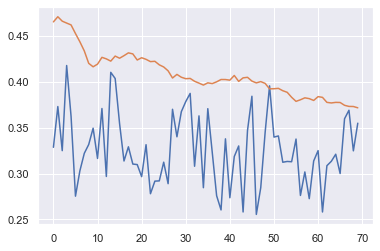

In [238]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])